# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+3$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+2$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
from sklearn.svm import SVC
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

In [2]:
np.random.seed(42)

In [5]:
def is_shattered(d, n, S_n):
    svc = SVC(kernel='linear', C=1e5, shrinking=False, tol=1e-5)

    possible_labels = list(product([0, 1], repeat=n))
    for y in possible_labels:
        y = np.array(y)
        if np.all(y == 0) or np.all(y == 1):
            continue
        svc.fit(S_n, y)
        if np.any(svc.predict(S_n) != y):
            return False
    return True

In [6]:
is_shattered(2, 3, np.array([[0, 0], [1, 1], [2, 2]]))

False

In [7]:
is_shattered(2, 2, np.array([[0, 0], [1, 1]]))

True

### c)

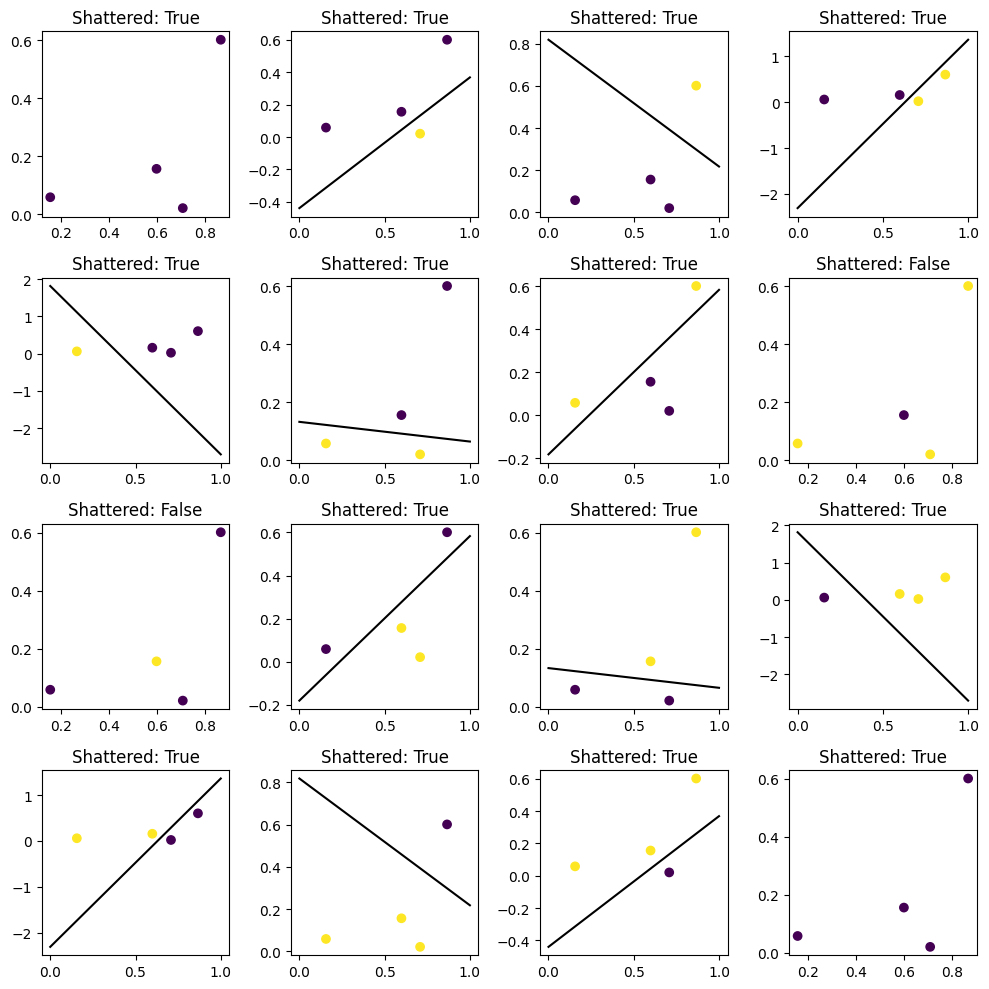

In [8]:
n = 4
d = 2
S_n = np.random.rand(n, d)
possible_labels = list(product([0, 1], repeat=n))
svc = SVC(kernel='linear', C=1e5, shrinking=False, tol=1e-5)
xx = np.linspace(0, 1, 100)

fig, axs = plt.subplots(4, 4, figsize=(10, 10))
axs = axs.flatten()
for i, ax in enumerate(axs):
    y = np.array(possible_labels[i])
    ax.scatter(S_n[:, 0], S_n[:, 1], c=y)
    if np.all(y == 0) or np.all(y == 1):
        shattered = True
    else: 
        svc.fit(S_n, y)
        if np.any(svc.predict(S_n) != y):
            shattered = False
        else: 
            shattered = True
            w = svc.coef_[0]
            a = -w[0] / w[1]
            yy = a * xx - (svc.intercept_[0]) / w[1]
            ax.plot(xx, yy, 'k-')
    ax.set_title(f"Shattered: {shattered}")
plt.tight_layout()

### d)

In [11]:
dd = np.arange(2, 11)
nn = np.arange(2, 14)
N = 50
vc_d = [None for d in dd]
vc_iter = np.zeros((len(dd), len(nn)))

for d in dd:
    print(f"\nChecking for d={d}")
    for n in nn:
        found = False
        for i in range(N):
            S_n = np.random.multivariate_normal(np.zeros(d), np.eye(d), n)
            if is_shattered(d, n, S_n):
                # print(f"S_{n} is shattered for d={d}")
                found = True
                vc_iter[d-2, n-2] = i
                break
        if not found:
            print(f"S_{n} is NOT shattered for d={d}")
            print(f"VC-dim for d={d} is at least {n}")
            vc_d[d-2] = n
            break 


Checking for d=2
S_4 is NOT shattered for d=2
VC-dim for d=2 is at least 4

Checking for d=3
S_5 is NOT shattered for d=3
VC-dim for d=3 is at least 5

Checking for d=4
S_6 is NOT shattered for d=4
VC-dim for d=4 is at least 6

Checking for d=5
S_7 is NOT shattered for d=5
VC-dim for d=5 is at least 7

Checking for d=6
S_8 is NOT shattered for d=6
VC-dim for d=6 is at least 8

Checking for d=7
S_9 is NOT shattered for d=7
VC-dim for d=7 is at least 9

Checking for d=8
S_10 is NOT shattered for d=8
VC-dim for d=8 is at least 10

Checking for d=9
S_11 is NOT shattered for d=9
VC-dim for d=9 is at least 11

Checking for d=10
S_12 is NOT shattered for d=10
VC-dim for d=10 is at least 12


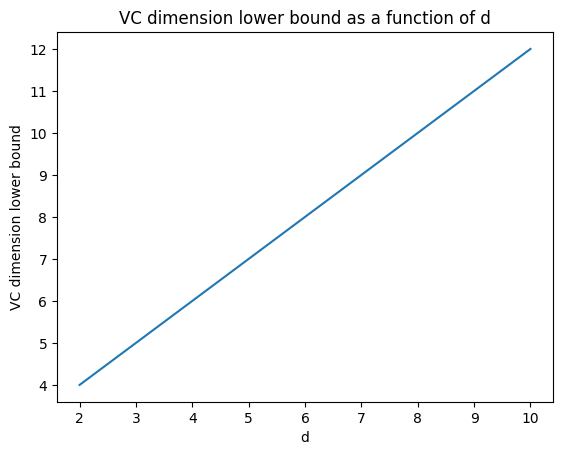

In [14]:
plt.plot(dd, vc_d) 
plt.xlabel("d")
plt.ylabel("VC dimension lower bound")
plt.title("VC dimension lower bound as a function of d")
plt.show()

According to the simulation, the VC dimension of the family of linear functions in $\mathbb{R}^d$ is $d+2$. This is consistent with the fact from the lecture.